# K_nn

## 1. Creating dataset

<IPython.core.display.Javascript object>


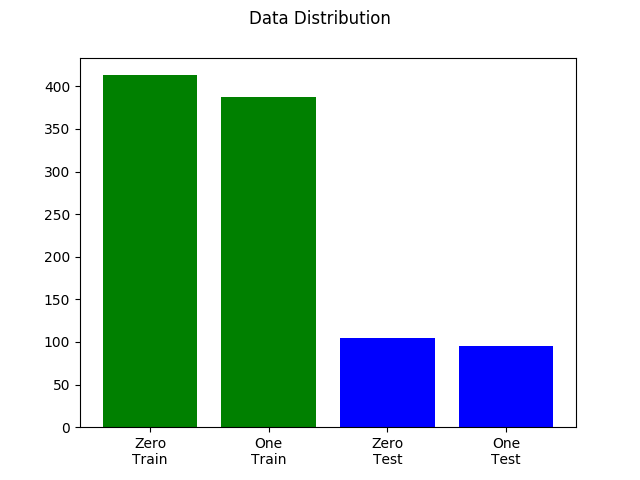

([<matplotlib.axis.XTick at 0x7f341f4c7c88>,
 <a list of 4 Text xticklabel objects>)

In [31]:
#Creating dataset

import pandas as pd
import numpy as np
import matplotlib as mpl

n = 1000

a = np.random.randint(1,101,(n,6))
b = np.random.randint(0,2,(n,a.shape[1]+1))
c = np.indices((n,b.shape[1]+1))
b[:,:-1] = a
c[0][:,1:] = b

data = c[0]
csv_data = c[0].tolist()

#writing using csv
#with open("dataset.csv", "a") as csv_file:
#    writer = csv.writer(csv_file)
#    writer.writerows(csv_data)
    
#writing to csv using pandas
pd_df = pd.DataFrame(csv_data)
pd_df.to_csv('dataset.csv', index = False, header = False)

#shuffling data list
np.random.shuffle(data)

#creating 80-20 split
ind = len(data)*(1/5)
test, train = data[:int(ind)], data[int(ind):]

train_zero = sum([1 for i in train if i[len(i)-1]==0])
train_one = sum([1 for i in train if i[len(i)-1]==1])

test_zero = sum([1 for i in test if i[len(i)-1]==0])
test_one = sum([1 for i in test if i[len(i)-1]==1])

#writing test and train data to csv
pd_df = pd.DataFrame(train)
pd_df.to_csv('train.csv', index = False, header = False)
pd_df = pd.DataFrame(test)
pd_df.to_csv('test.csv',index=False, header = False)

#plotting data distribution
fig = plt.figure()
fig.suptitle('Data Distribution')
plt.bar(range(1,3),(train_zero,train_one),color = 'g')
plt.bar(range(3,5),(test_zero,test_one),color = 'b')
plt.xticks(range(1,5), ['Zero\nTrain','One\nTrain','Zero\nTest','One\nTest'])

### Inferences
1. As we can see both test and train have almost same ratio of zero and ones, because of random split.
2. The split here is 80:20

## 2. K_nn implementation

<IPython.core.display.Javascript object>


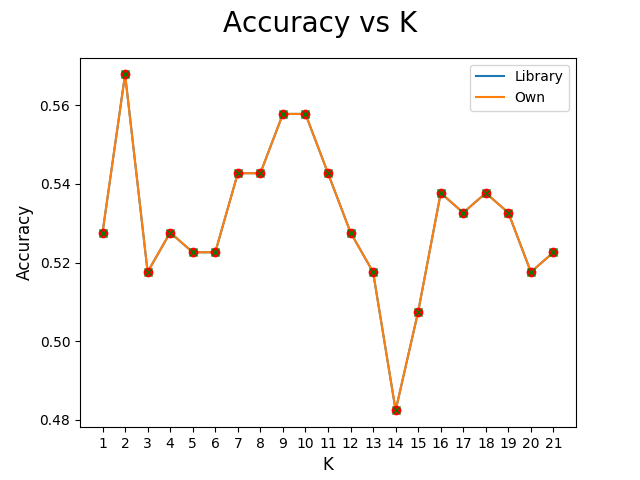

<IPython.core.display.Javascript object>


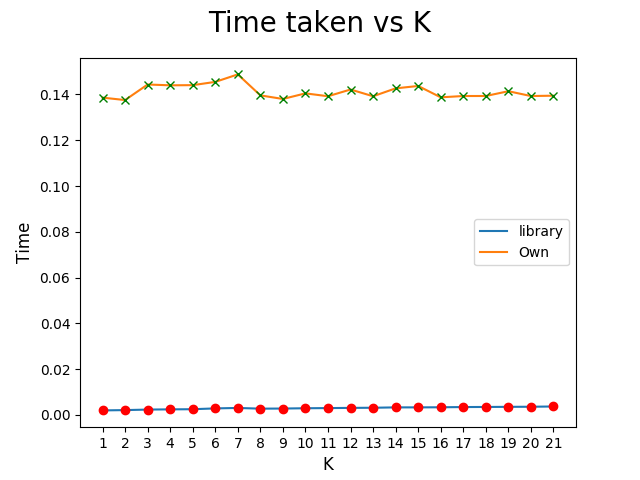

In [35]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from operator import itemgetter
from time import time

n = 1000

#returns distance of every point in a list, with a given point in form of list
def dist(a,b):
    d = np.array(a)[:,1:7]
    e = np.array(b)[1:7]
    return (np.sqrt(np.dot(((d - e)**2), np.ones((6,1))))).ravel()

#knn class containing self implemented and library funcitons for knn
class knn:
    
    def collectData(self):
        #reading test and train data
        df = pd.read_csv('train.csv', delimiter = ',')
        trn = [list(x) for x in df.values]
        df = pd.read_csv('test.csv', delimiter=',')
        tst = [list(x) for x in df.values]
        return trn, tst
    
    def k_nn_own(self,k,train,test):
        predictions= []
        for point in test:
            
            #calculating distance of the point with every other point in the train data
            distance = dist(train,point)
            distance = distance.ravel()
            
            #getting class labels
            labels = train[:,7:]
            labels = labels.ravel()
            
            #sorted values of distance with taken point
            values = np.array(sorted(zip(labels.tolist(),distance.tolist()), key=itemgetter(1))) 
            
            #selecting k nearest neighbours
            values=values[:k] 
            
            label = [0,0] # 1st element represents neighbour of class 0 and 2nd represent neighbour of class 1
            
            #comparing count of different class neighbours
            for value in values:
                label[int(value[0])] += 1
            if(label[0] >= label[1]):
                predictions.append(0)
            else:
                predictions.append(1)
        return predictions
    
    def accuracy(self,test, predictions):
        #return accuracy
        correct = 0
        for x in range(len(test)):
            if(predictions[x]==test[x][-1]):
                correct +=1
        return (float(correct)/len(test))
    
    def k_nn_lib(self,k,train,tests):
        #library function for knn
        neighbour = KNeighborsClassifier(n_neighbors = k, weights='uniform', algorithm='auto')
        neighbour.fit(train[:,1:7],train[:,7:].ravel())
        predictions = neighbour.predict(test[:,1:7])
        return predictions

#main program
current = knn()
train,test = current.collectData()
train = np.array(train)
test = np.array(test)
acc_own = []
acc_lib = []
index = []

time_own = []
time_lib = []
for k in range(1,22):
    t1 = time()
    acc_own.append(current.accuracy(test, current.k_nn_own(k,train,test)))
    t2 = time()
    time_own.append(t2-t1)
    
    t1 = time()
    acc_lib.append(current.accuracy(test, current.k_nn_lib(k,train,test)))
    t2 = time()
    time_lib.append(t2-t1)
    
    index.append(k)

#plotting accuracy with k
fig = plt.figure()
plt.plot(index,acc_lib,label="Library")
plt.plot(index,acc_own,label="Own")
plt.legend()
plt.plot(index,acc_lib, 'ro')
plt.plot(index,acc_own, 'gx')
fig.suptitle('Accuracy vs K', fontsize=20)
plt.xlabel('K', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(range(1,22))
plt.show()

#plotting time with k
fig2 = plt.figure()
plt.plot(index,time_lib,label="library",)
plt.plot(index,time_own,label="Own")
plt.legend()
plt.plot(index,time_lib, 'ro')
plt.plot(index,time_own, 'gx')
fig2.suptitle('Time taken vs K', fontsize=20)
plt.xlabel('K', fontsize=12)
plt.ylabel('Time', fontsize=12)
plt.xticks(range(1,22))
plt.show()

### Comparison between Accuracies:
1. For odd values , Accuracy is exactly same.
2. For even values of k, it will be implementation dependent. If we treat a point as misclassified(belongs to class 0) when there is a tie, we get exact opposite accuracies for our implementation and libraries implementation. But here we are considering it as classified, that's why accuracies are almost equal.
3. Accuracies are generally less than 50% for KNN classifier.

### Comparison between Time Taken
1. Our algorithm takes much more time then libraries implementation becuase of inefficient O((N^2).log(N))